<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [107]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [53]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



D:\progs\conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


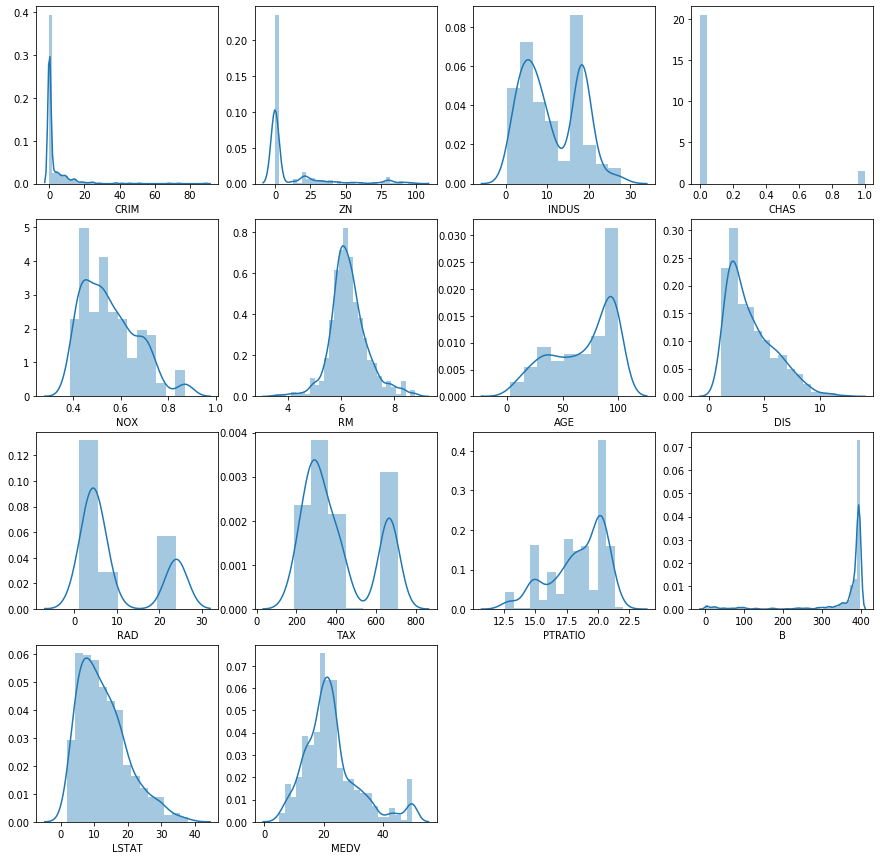

In [54]:
plt.figure(figsize = (15, 15))                # Нормальное - RM
i = 0                                         # Равномерного тут не вижу
                                              # Биноминальное тут не вижу 
for name in names:                            # Бернулли - CHAS 
    i+=1                                      # Геометрическое - DIS и LSTAT
    plt.subplot(4, 4, i)                      # Логнормальное - CRIM, ZN
    sns.distplot(data[name])                  # RAD и TAX и INDUS похожи на бимодальное
                                              #
                                              #вообще я чувствую себя немного неуверено с геометрическим распределением, потому
                                              # что я бы просто назвала DIS и LSTAT right-skewed
        

<img src=https://sigmamagic.com/blogs/images/skewness.jpg width="400">


Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

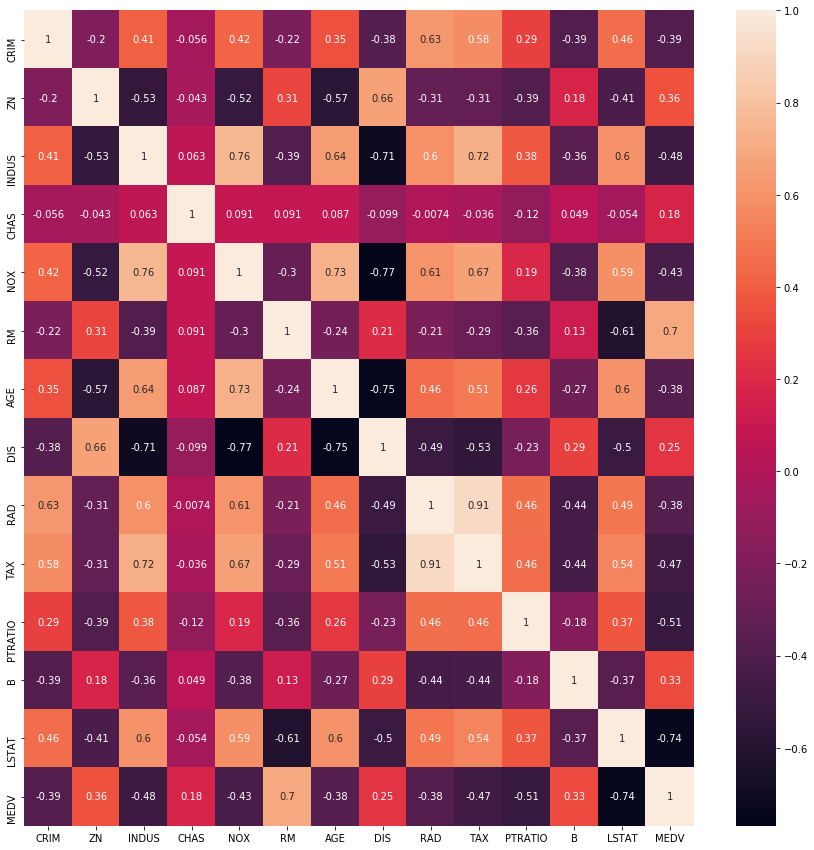

In [55]:
plt.figure(figsize = (15, 15))                        # RM - 0.7 максимально позитивно коррелирующий
sns.heatmap(data.corr(),annot=True)                   # LSTAT -0.74 максимально негативно коррелирующий

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data.LSTAT, data.MEDV, test_size = 0.2)

In [57]:
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

predicted_y = model.predict(np.array(X_test).reshape(-1,1))

In [64]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'Mean_squared_error: {mean_squared_error(predicted_y, y_test)}')
print(f'Mean_absolute_error: {mean_absolute_error(predicted_y, y_test)}')
print(f'Model.score: {model.score(np.array(X_train).reshape(-1,1), y_train)}')


Mean_squared_error: 33.74540784677382
Mean_absolute_error: 4.224684970452682
Model.score: 0.55128507864348


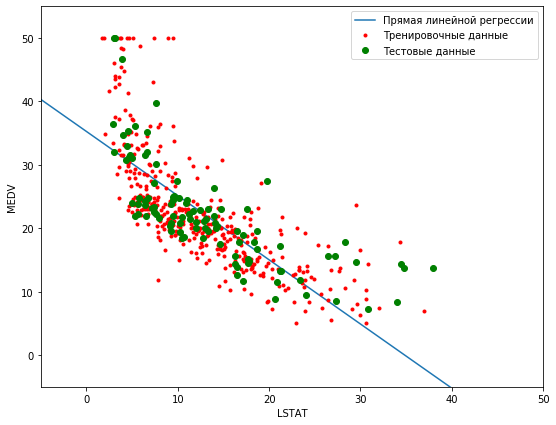

In [110]:
plt.figure(figsize = (9, 7)) 

x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)

plt.plot(X_train, y_train, 'r.')

plt.plot(X_test, y_test, 'go')

plt.xlim(-5,50)
plt.ylim(-5, 55)

plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
 
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [67]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [70]:
df.isna().sum()    # вот данные по отсутсвтующим значениям, все страны есть, поэтому ничего не надо убирать

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [72]:
print(len(df['Country (region)'].unique()))       # 156 стран
df['Country (region)'].unique()

156


array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajik

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

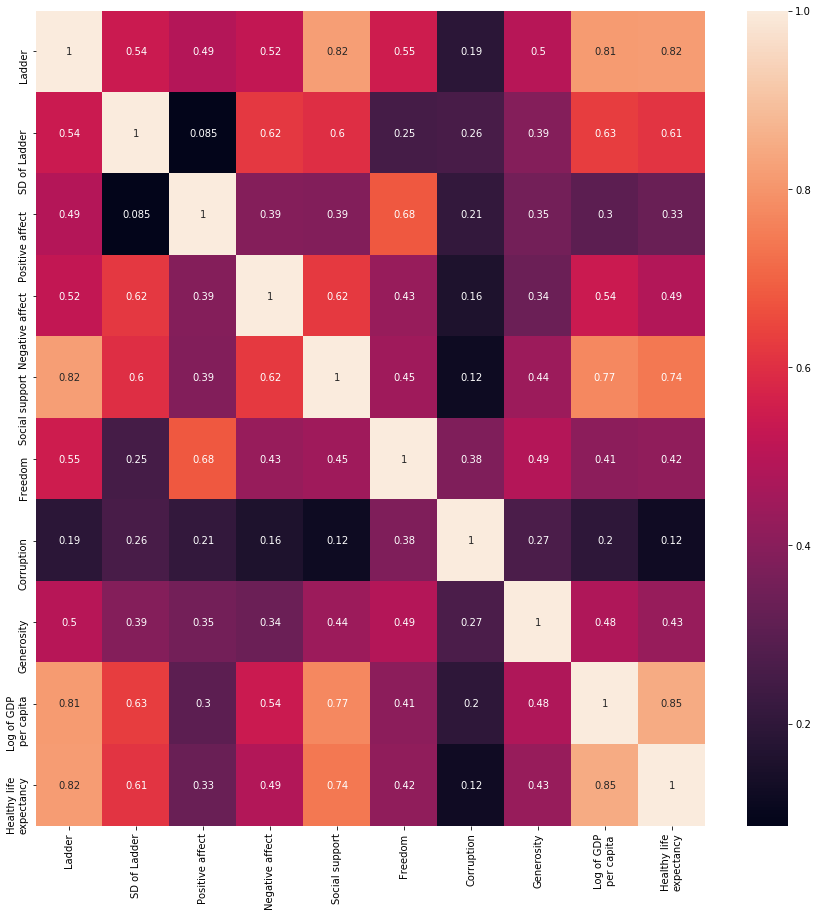

In [73]:
plt.figure(figsize = (15, 15))                      
sns.heatmap(data.corr(),annot=True)    


# самые высокие корреляции в таблице с Ladder, сначала я думала, что это какая-то вариация индекса в этой таблице
# потому что они идут от 1 до 156. но оказывается это уровень удовлетворенности. Выходит, что у Ladder высокая
# корреляция с Social support и с Log of GDP\nper capita и Healthy life\nexpectancy 0,82, 0,81, 0,82 соответсвенно. 
# Positive правда имеет самую высоку корреляцию с Freedom  - 0.68
# Также Log of GDP\nper capita и Healthy life\nexpectancy имеют высокую корреляцию - 0,85
# Негативных корреляций нет. 
# Интересно, что Corruption имеет очень нихкую корреляцю со свеми другими атрибутами

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

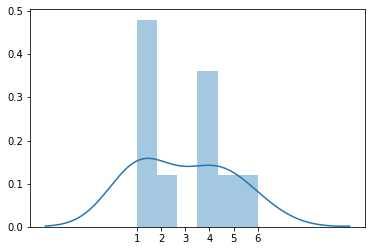

In [106]:
ax = plt.subplot()

values = np.random.randint(1, 7, size=10)
sns.distplot(values, bins = 6)  
ax.set_xticks(range(1, 7))
ax.set_xticklabels([1, 2, 3, 4, 5, 6])

# распределение 10 бросков - ненормальное
# вероятно в этом подбрасывании похоже на бимодальное, но они каждый раз разные

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

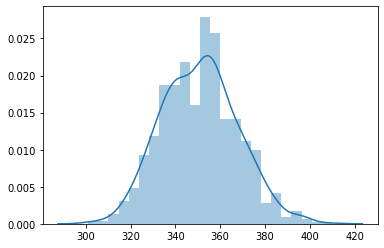

In [111]:
from scipy.stats import rv_discrete  
distrib = rv_discrete(values=([1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6]))

sums = []
for i in range(1001):
    sums.append(sum(distrib.rvs(size=100)))

sns.distplot(sums)  



# потому что сумма большого числа, а у нас большое число, случайных величин имеет распределение
# очень близкое к нормальному, что у нас и видно по графику
